In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib._image as mpimg
import seaborn as sns
%matplotlib inline

np.random.seed(2)

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import itertools

from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, MaxPool2D, Conv2D, Flatten, Dropout
from keras.optimizers import RMSprop
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau

sns.set(style='white',context='notebook',palette='deep')


In [70]:
train = pd.read_csv('/Users/pankajprajapati/Documents/data/21dec/train.csv')
test = pd.read_csv('/Users/pankajprajapati/Documents/data/21dec/test.csv')

In [71]:
train.head(5)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [72]:
y_train = train['label']
x_train = train.drop(labels=['label'],axis=1)

In [73]:
del train

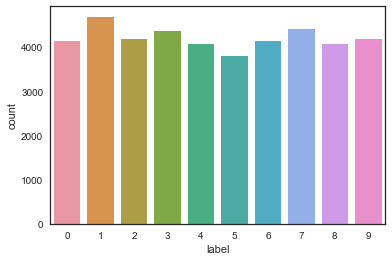

In [74]:
sns.countplot(y_train)

In [75]:
x_train.isnull().any().describe()

count       784
unique        1
top       False
freq        784
dtype: object

In [76]:
x_train = x_train/255
test = test/255

In [77]:
x_train = x_train.values.reshape(-1,28,28,1)
test = test.values.reshape(-1,28,28,1)

In [78]:
y_train=to_categorical(y_train,num_classes=10)

In [79]:
random_seed=2

In [80]:
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train,test_size=0.1,random_state=random_seed)

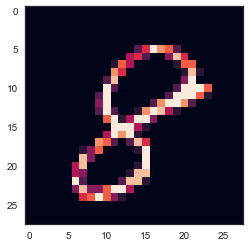

In [81]:
plt.imshow(x_train[0][:,:,0])

In [82]:
x_val.shape

(4200, 28, 28, 1)

In [83]:
y_train.shape

(37800, 10)

In [84]:
model = Sequential()
model.add(Conv2D(32,kernel_size=5, padding='Same',activation='relu',input_shape=(28,28,1)))
model.add(Conv2D(32, kernel_size=5, padding='same', activation='relu'))
model.add(MaxPool2D(2))
model.add(Dropout(0.25))
model.add(Conv2D(64,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(64,kernel_size=3,padding='same',activation='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10,activation='softmax'))
# model.summary()
model.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy'])

In [85]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', 
                                            patience=3, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)

In [86]:
epochs = 1 # Turn epochs to 30 to get 0.9967 accuracy
batch_size = 86

In [87]:
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images


datagen.fit(x_train)

In [ ]:
history = model.fit(x_train, y_train,steps_per_epoch=x_train.shape[0],validation_steps=x_val.shape[0],epochs=1,validation_data=(x_val,y_val),verbose=2,callbacks=[learning_rate_reduction])





Train on 37800 samples, validate on 4200 samples
Epoch 1/1


In [ ]:
history = model.fit_generator(datagen.flow(x_train,y_train, batch_size=batch_size),
                              epochs = epochs, validation_data = (x_val,y_val),
                              verbose = 2, steps_per_epoch=x_train.shape[0] // batch_size
                              , callbacks=[learning_rate_reduction])